# 高等数学与数值计算
## (一) 以微分初步知识及梯度下降算法解决最优化问题

<div class="alert alert-info" role="alert">
❓ GitModel 公司发明了一种专用于数值计算的平板电脑 GitNum$,$ 考虑到员工生产效率的问题$,$ GitNum 的生产成本是与生产台数相关的. 函数关系为 

$$C(n)=1250n(2-e^{-(n-5000)^2}).$$
    
请问如何确定这批 GitNum 的生产台数使得每台的平均生产成本最小使得经济效益最大呢?
</div>

```分析```： 求平均生产成本最小$,$ 本质上就是求平均成本函数 $\overline{C}(n)=\dfrac{C(n)}{n}$ 的最小值. 事实上$,$ 初中我们就经常接触类似的最值问题$,$ 只不过所谓的目标函数往往是最简单的二次函数. 而在高中之后我们学习了求导工具之后发现对任意可导的函数我们都可以探究其导数异号零点来确定其极值点.

诚然$,$ 仅仅是导数零点并不足以说明其就是极值点$,$ 如下图的函数 $y=x^3,$ 我们发现 $x=0$ 是其导数零点但在图像上仅仅只是函数的一个$"$拐点$"$.

<img src="./figures/1.jpg" width=700>

<center>图 1 : $y=x^3$ 及其导数图像</center>

这是因为导函数 $y'=3x^2$ 在导数零点 $x=0$ 处仅仅是$"$切过$"$ $x$ 轴而非$"$穿过$"$ $x$ 轴! 而分析学告诉我们$,$ 导函数$f$ 在零点 $x_0$ 处 $"$穿过$"$ $x$ 轴的图像性质本质上就是 $f$ 在零点处附近是单调的$,$ 亦即二阶导函数 $($导数的导数$)$ $f''(x_0)>0$ 或 $f''(x_0)<0$!

<img src="./figures/1-2.png" width=700>

<center>表 1 : 极值点函导数性态</center>

回到问题上来$,$ 要求 $\overline{C}(n)$ 的极值点$,$ 我们首先需要求出导函数 $\overline{C}'(n)$ 的零点 $n_0,$ 如果 $\overline{C}''(n_0)>0,$ 那么 $n_0$ 即为 $\overline{C}(n)$ 的极小值点.

代码如下 :

In [18]:
from sympy import *

n = symbols('n')
y = 1250*(2-exp(-(n-5000)**2))

func1 = diff(y,n) # 求导数
func1

-1250*(10000 - 2*n)*exp(-(n - 5000)**2)

In [19]:
stag = solve(diff(y,n),n)
print("该函数驻点为",stag) # 计算驻点

该函数驻点为 [5000]


In [20]:
# 计算二阶导数
func2 = diff(y, n, 2) # 求导数
func2

2500*(1 - 2*(n - 5000)**2)*exp(-(n - 5000)**2)

In [21]:
# 计算驻点的二阶导数值，验证正负
print(func2.evalf(subs = {n:5000}))
func2.evalf(subs = {n:5000}) > 0

2500.00000000000


True

In [22]:
# 函数的极小值
y.evalf(subs = {n:5000})

1250.00000000000

经验证$,$ $n_0=5000$ 确实为 $\overline{C}(n)$ 的极小值点$,$ 即第一批 GitNum 生产台数计划为 $5000$ 台时平均成本最小$,$ 为 $1250$ 元/台.

<div class="alert alert-info" role="alert">
<strong> 抽象提炼 </strong> 
    
数学建模中$,$ 优化问题是渗透到各个方面的$,$ 小到最优参数的确定$,$ 大到最优策略的规划. 每一个优化问题都可以以如下标准形式给出 : 
\begin{equation}
	\max f(x)
\end{equation}
$$\mathrm{s.t.} \begin{cases}
	g_i(x)\geqslant 0,i=1,2,\cdots,n\\
	h_j(x)=0,j=1,2,\cdots,m
\end{cases}$$
其中 $f(x)$ 即是我们需要求最值的函数$,$ $x$ 是我们用来 $"$决策$"$ 的变量. $g_i(x)\geqslant 0,h_j(x)=0$ 分别是决策变量 $x$ 满足的条件$,$ 即决策变量 $x$ 的约束. 当决策变量 $x$ 没有约束时$,$ 称为<strong>无约束优化问题</strong>.
</div>

上文提到的GitNum生产台数问题即为一个最简单的无约束优化问题——目标函数有**明确表达式，二阶以上可导，定义域离散程度不高. 往往生产一批产品的数量范围是足够大的以至于我们可以将离散的整数视为连续的**. 对于这样的简单优化问题$,$ 利用数学分析的知识可以做到精确的分析. 我们给出优化领域最经典也是最实用的判别条件.

<div class="alert alert-info" role="alert">
<strong> 命题1:[一阶最优化必要条件] </strong> 

设 $f(x)$ 是 $\mathbf{R}$ 上的可导函数. 若 $x^*$ 是 $f$ 的极值点则
\begin{equation}\tag{2}
	f'(x^*)=0.
\end{equation}
其中 $f'$ 是 $f$ 的一阶导数.
</div>

<div class="alert alert-info" role="alert">
<strong> 命题2:[二阶最优化必要条件] </strong> 

设 $f(x)$ 是 $\mathbf{R}$ 上的可导函数. 若 $x^*$ 是 $f$ 的极值点则
设 $f(x)$ 是 $\mathbf{R}$ 上的二阶可导函数. 若 $x^*$ 是 $f$ 的极大$($小$)$值点则
\begin{equation}\tag{3}
	f'(x^*)=0,f''(x^*)\leqslant0 (f''(x^*)\geqslant 0).
\end{equation}
其中 $f''$ 是 $f$ 的二阶导数.
</div>

<div class="alert alert-info" role="alert">
<strong> 命题3:[二阶最优化充分条件] </strong> 

设 $f(x)$ 是 $\mathbf{R}$ 上的二阶可导函数. 若 $x^*$ 满足
$$f'(x^*)=0,f''(x^*)<0 (f''(x^*)>0),$$
则 $x^*$ 是 $f$ 的极大$($小$)$值点.
</div>

<div class="alert alert-info" role="alert">
❓ GitModel 公司通过 GitNum 的发售赚到第一桶金后马不停蹄地投入到 GitNum 的改良研制中$,$ 经市场调查后 GitModel 公司发现根据用户需求可推出轻便版以及高性能版的 GitNum. 三种 GitNum:

<img src="./figures/1-4.png">

在这一批生产中$,$ GitModel 公司应该制定怎么样的生产计划即三种 GitNum 的生产台数才能使得利润与成本的比值最大化?
</div>

我们把三种 GitNum 的生产台数按上表顺序标记序号 $n_i,i=1,2,3,$ 分别用 $R,Q,C$ 来代表收入$,$ 利润以及成本. 问题旨在求出利润/成本 $r=\dfrac{Q}{C}$ 的最大值$,$ 而我们需要同时考虑三种 GitNum 的生产台数$,$ 也就是说$,$ 需要求极值的函数 $r$ 是 $n_1,n_2,n_3$ 的多元函数 ! 

我们逐步将各种函数列出来以得到目标函数 $\dfrac{Q}{C},$ 总收入函数为 $$R(n_1,n_2,n_3)=2000n_1+3000n_2+4500n_3,$$
总成本函数为
$$C(n_1,n_2,n_3)=750n_1(2-e^{-(n_1-6000)^2})+1250n_2(2-e^{-(n_2-5000)^2})+2000n_3(2-e^{-(n_3-3000)^2}),$$
总利润函数为
$$Q(n_1,n_2,n_3)=R(n_1,n_2,n_3)-C(n_1,n_2,n_3),$$
所以总利润与总成本比值为

\begin{align*}
	r(n_1,n_2,n_3)&=\dfrac{R(n_1,n_2,n_3)-C(n_1,n_2,n_3)}{C(n_1,n_2,n_3)}\\
	&=\dfrac{R(n_1,n_2,n_3)}{C(n_1,n_2,n_3)}-1\\
	&=\dfrac{2000n_1+3000n_2+4500n_3}{750n_1(2-e^{-(n_1-6000)^2})+1250n_2(2-e^{-(n_2-5000)^2})+2000n_3(2-e^{-(n_3-3000)^2})}-1.
\end{align*}

优化问题即为
$$
\max\limits_{n_1,n_2,n_3\geqslant 1}r(n_1,n_2,n_3).
$$

依样画葫芦$,$ 该问题不过是第一个问题的变量 Plus 版$,$ 我们仍然可以采用研究导数以及二阶导数性态的方式去求出极大值组合 $(n_1^*,n_2^*,n_3^*).$ 

**那有的同学可能就会问了 : 一元函数分析跟多元函数分析有什么区别呢?**

在多元函数 $f$ 中$,$ 我们只能对单个变量 $x$ 求偏导数 $f_x,$ 这远远不足以刻画导数的全部信息. 所以$,$ 梯度 $($全导数$)$ 以及 Hesse 矩阵的概念替代了一元函数中导数以及二阶导数.

<div class="alert alert-info" role="alert">
<strong> 定义1:[Hesse 矩阵] </strong> 

设 $f:\mathbf{R}^n\to R$ 是 $n$ 元函数$,$ $x_i,i=1,2,\cdots,n$ 是变量.
	
记 $f$ 对变量 $x_i$ 方向的偏导数为 $f'_i,$ 称所有偏导数组成的列向量 $[f_1',f_2',\cdots,f_n']^T := \nabla f,$ 为函数 $f$ 的全导数$,$ 亦称**梯度**.
	
记偏导数 $f_i'$ 对变量 $x_j$ 方向的二阶偏导数为 $f''_{ij}$ 称 $n\times n$ 方阵$$\begin{bmatrix}
		f''_{11}&f''_{12}&\cdots & f''_{1n}\\
		f''_{21}&f''_{22}&\cdots & f''_{1n}\\
		\vdots&\vdots&\ddots &\vdots\\
		f''_{n1}&f''_{n2}&\cdots & f''_{nn}\\
	\end{bmatrix} := \nabla^2 f,$$ 
为函数 $f$ 的<strong> Hesse 矩阵</strong>.
</div>

在推广最优化条件之前$,$ 我们先从直观上进行条件的表述. 如下图:

<img src="./figures/1-8.jpg" width = 500>

<img src="./figures/1-9.jpg" width = 400>

从上图我们不难猜测 

<img src="./figures/1-10.png">

事实上$,$ 通过 Taylor 展开我们即可验证猜想的正确性$,$ 理论证明不难而繁$,$ 我们只保留最精华实用的命题 : 最优化条件对应的多元函数版本则如下 :

<div class="alert alert-info" role="alert">
<strong> 命题4:[多元无约束问题一阶最优化必要条件] </strong>

设 $f(x)$ 是 $\mathbf{R}^n$ 上的 $n$ 元可导函数. 若 $x^*$ 是 $f$ 的极值点则

\begin{equation*}
\nabla f(x^*)=0.
\end{equation*}
其中 $\nabla f$ 是 $f$ 的梯度.
</div>

<div class="alert alert-info" role="alert">
<strong> 命题5:[多元无约束问题二阶最优化必要条件] </strong> 

设 $f(x)$ 是 $\mathbf{R}^n$ 上的 $n$ 元二阶可导函数. 若 $x^*$ 是 $f$ 的极大$($小$)$值点则

\begin{equation*}
\nabla f(x^*)=0,\nabla^2 f(x^*) \ \text{半负定} \ (\nabla^2 f(x^*)\ \text{半正定}).
\end{equation*}
其中 $\nabla^2 f$ 是 $f$ 的 Hesse 矩阵.
</div>

<div class="alert alert-info" role="alert">
<strong> 命题6:[多元无约束问题二阶最优化充分条件] </strong> 

设 $f(x)$ 是 $\mathbf{R}^n$ 上的 $n$ 元二阶可导函数. 若 $x^*$ 满足
$$	\nabla f(x^*)=0,\nabla^2 f(x^*) \ \text{负定} \ (\nabla^2 f(x^*)\ \text{正定}).$$
则 $x^*$ 是 $f$ 的极大$($小$)$值点.
</div>

而代数学的知识告诉我们,**验证一个对称矩阵是否正(负)定只需要 check 其所有特征值是否大(小)于0**.

所以$,$ 要制定最佳的生产计划 $(n_1^*,n_2^*,n_3^*)$ 使得利润与成本比值最大$,$ 即求解问题(2)$,$ 只需要求出$3$元方程组

$$\nabla r=0$$
的解集$,$ 再挑出解集中使得 $\nabla^2 r$ 负定的解$,$ 这就是我们的最佳生产计划 $(n_1^*,n_2^*,n_3^*)$!

最优化条件给出了这样一个基本事实 : 不管函数 $f$ 表达式复杂与否$,$ 只要二阶以上可导$,$ 我们只需要找出满足 Hesse 矩阵 $\nabla ^2f$ 半负定$($半正定$)$的梯度零点$,$ 极大$($小$)$值点必定存在其中! 

<div class="alert alert-info" role="alert">

❓ 这时喜欢思考的同学就会问了$,$ 老师$,$ 既然我们通过求极值要通过求解梯度方程 $\nabla f=0,$ 那么变量一旦多起来$,$ 求解方程组的难度也会迅速上升$,$ 并且还存在方程无法求解的问题$($比如超越方程 $\ln x+x-3=0),$ 这个时候怎么办呢?
</div>

虽然抽象的理论只能提供许多$"$理论上可行$"$的解决方式$,$ 但俗话说的好$,$ 车到山前必有路$,$ 方程求解不出来$,$ 我们能不能找到近似解呢? 计算机说$,$ 💃退!💃退! 💃退!

其实$,$ 现实生活中我们遇到的许多优化问题需要解的方程都是超越方程$,$ 早已超出人力计算的范畴$,$ 而我们衍生的许多数值计算方法就是为了求出这类方程的近似解的. 优化问题中一个最经典的求极值算法便是针对优化条件发明的**梯度下降法**——通过迭代的方式找到一列**梯度递减的点**,当点的**梯度下降的足够接近$0$**时便可认为该点即是极值的候选之一. 


下面我们介绍如何使用scipy求解多元函数的极值

In [16]:
import scipy.optimize as opt
from scipy import fmin
import numpy as np

In [17]:
def func0(cost, x, a):
    return cost*x*(2 - exp(-(x - a)**2))
func = lambda x: (2000*x[0] + 3000*x[1] + 4500*x[2]) / (func0(750, x[0], 6000) + func0(1250, x[1], 5000) + func0(2000, x[2], 3000)) - 1 
bnds = ((1, 10000), (1, 10000), (1, 10000))
res = opt.minimize(fun=func, x0=np.array([2, 1, 1]), bounds=bnds)
res

      fun: 0.126002628474091
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 6.23634481e-04,  3.70947719e-04, -8.03801974e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 64
      nit: 15
     njev: 16
   status: 0
  success: True
        x: array([  1.        ,   1.        , 123.67230208])

## (二) : 以插值知识解决数据处理问题

<div class="alert alert-info" role="alert">
❓ GitModel 公司工作室刚刚建完，准备安装宽带以及路由，基于传输数据要求，GitModel 需要的宽带运营商网速越快越好，而由于网速是一个随时间变化的非固定量，简单衡量平均网速也并非一个好的评价手段, GitModel 准备收集在同一个地点各个运营商的宽带一天内的网速数据<strong>以做接下来的建模分析</strong>, 出于人力考虑,网速监视每小时汇报一次数据. A运营商的宽带24小时网速如下表: 
</div>

<img src="./figures/1-5.png" width = 200>

<div class="alert alert-info" role="alert">

然而$,$ 应该注意到离散的数据点无法完美体现网速的整体性质$,$ 我们需要通过仅有的数据点还原宽带一天内的实时网速. 以 $A$ 运营商为例$,$ 请问 GitModel 公司应如何$"$模拟$"$出网速曲线呢?
</div>

该问题说数学话版$,$ 就是需要找出一条经过上表 $24$ 个点 $(t_i,s_i),i=1,2,\cdots,24$ 的曲线 $s=s(t),$ 我们自然会问$,$ 那怎么构造 $s(t)$ 合适呢? 又应该怎么说明构造的 $s(t)$ 能有较好的模拟效果呢?

我们接着往下分析 : 由于宽带用户千千万万$,$ 大基数导致了使用宽带的用户数关于时间 $t$ 的变化是近似连续的$,$ 从而网速 $s(t)$ 可以假设为 $t$ 的连续函数$,$ 更甚之$,$ 可以假设为斜率以及曲率 $s'(t),s''(t)$ 连续! 我们将 $s(t)$ 的满足条件罗列如下 : 
- $s(t)$ 过 $24$ 个数据点 $s_i=s(t_i),i=1,2,\cdots,24.$
- $s(t)$ 连续.
- $s'(t)$ 连续.
- $s''(t)$ 连续.

$s(t)$ 应该满足的条件暂且如此$,$ 我们再进行思考 : 有什么构造 $s(t)$ 方式是比较简单的呢?

在高中我们就已经学过了给定一组数据点可通过**最小二乘法**来拟合出一条回归直线$,$ 诚然$,$ 两点一直线的数学直觉告诉我们能过 $24$ 个数据点的直线几乎不存在$,$ 那么我们可否放宽条件$,$ 构造出过 $24$ 个数据点的折线呢? 这显然是可以的! 过数据点的条件可由分段函数来解决.

用数学的语言$,$ 即是分别在每一个区间 $[t_i,t_{i+1}],i=1,2,\cdots,23$ 上以 $(t_i,s_i),(t_{i+1},s_{i+1})$ 为两端构造线段 $s_{i}(t)=k_it+b_i,t\in [t_i,t_{i+1}],i=1,2,\cdots,23,$ 其中 $k_i,b_i$ 为参数$,$ 但确定 $k_i,b_i$ 对我们来说也是小菜一碟的. 具体构造如下图 :

<img src="./figures/1-6.jpg" width = 400>


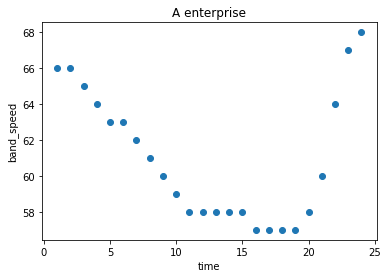

In [23]:
import matplotlib.pyplot as plt

# 将表格转换为图片
time_gap = np.linspace(1, 24, 24)
band_speed = np.array([66, 66, 65, 64, 63, 63, 62, 61, 60, 59, 58, 58, 58, 58, 58, 57, 57, 57, 57, 58, 60, 64, 67, 68])
plt.scatter(time_gap, band_speed)
plt.xlabel('time')
plt.ylabel('band_speed')
plt.title('A enterprise')
plt.show()

对比 $s(t)$ 要满足的条件$,$ 折线的构造方式显然满足了前两个条件$,$ 我们再结合上图进行思考 : 折线不满足 $s'(t)$ 连续是因为在数据点 $(t_i,s_i)$ 处不一定可导$,$ 即左右导数不相同$,$ 以此反推$,$ 我们希望构造出来的分段函数 $s_i(t)$ 们在$"$连接处$"(t_{i},s_i),(t_{i+1},s_{i+1})$ 都应该有导数以及二阶导数相等. 现在$,$ 我们正式将条件写为数学形式 : 

\begin{align*}
	&\text{过点 : } s_{i}(t_i)=s_i,i=1,2,\cdots,23,s_{23}(t_{24})=s_{24}\\
	&\text{分段连接 : } s_{i}(t_{i+1})=s_{i+1}(t_{i+1}),i=1,2,\cdots,22\\
	&\text{斜率相等 : }s_{i}'(t_{i+1})=s_{i+1}'(t_{i+1}),i=1,2,\cdots,22\\
	&\text{曲率相等 : }s_{i}''(t_{i+1})=s_{i+1}''(t_{i+1}),i=1,2,\cdots,22
\end{align*}
那么$,$ 既然折线即分段一次函数不满足导数相等$,$ 从求导的难度上我们自然会考虑分段二次函数怎么样呢? Unfortunately $,$ 分段二次函数满足了导数相等但二阶导数不相等$,$ 而按图索骥我们即知道分段三次函数即能满足我们对 $s(t)$ 的所有期待!

\begin{align*}
	\text{分段直线构造}&\rightarrow{\text{解决}} s(t) \ \text{过} \ 24 \ \text{个数据点且连续}\\
	\text{分段抛物线构造}&\rightarrow{\text{解决}}  s'(t) \text{连续}\\
	\text{分段三次曲线构造}&\rightarrow{\text{解决}}  s''(t) \text{连续}\\
\end{align*}
构造出来的分段三次曲线如下 : 
\begin{equation*}
	s_i(t)=s_{i,0}+s_{i,1}t+s_{i,2}t^2+s_{i,3}t^3,i=1,2,\cdots, 23\\
\end{equation*}
 应该满足上面的四个式子$,$ 一共是 $90$ 条方程$,$ 而未知数有 $92$ 个$,$ 事实上$,$ 仍需确定的只有起点 $(t_1,s_1)$ 与 $(t_{24},s_{24})$ 的二阶函数值 $s_1''(t_1),s_{23}''(t_{24}).$

我们这里假设 $s_1''(t_1)=s_{23}''(t_{24})=0,$ 实际含义为在 $0:00\sim 1:00$ 处的网速变化应该逐渐变慢$,$ 那么便可以通过 $($\ref{eq 2.1},\ref{eq 2.2},\ref{eq 2.3},\ref{eq 2.4}$)$ 与 $s_1''(t_1)=s_{24}''(t_{24})=0$ 建立方程组求出 $($\ref{eq 2.5}$)$ 的所有未知数! 

好事成双$,$ 思维敏捷的同学应该已经发现了 : 对于多项式函数$,$ 无论求多少阶导$,$ 都是 $1,t,t^2,t^3$ 的线性组合! 而这即告诉我们需要解的方程组是一个线性方程组!

<img src="./figures/1-7.jpg">


<div class="alert alert-info" role="alert">
<strong> 📋 小结： </strong> 

我们将这种构造过数据点函数的过程称为<strong>插值</strong>$,$ 在建模中常常用于数据的$"$补充$"$或者$"$还原$",$ 能有效解决建模中数据量过少的问题. 目前最通用的插值方式即上文提到的分段三次曲线构造$,$ 亦称为<strong>三次样条插值</strong>. 由于我们接触的许多数据是具有某种意义上的$"$连续性$"$的$,$ 而三次样条插值具有的最佳实用性质就是其$"$摆动极小$",$ 应用也就屡见不鲜了.
</div>

从上文我们知道如果有 $n+1$ 个数据点$,$ 那么三次样条插值的未知数$($即多项式系数$)$一共有 $4n$ 个而我们的条件所给出的方程只有 $4n-2$ 条$,$ 亦即还需要有 $2$ 个条件诱导 $2$ 条方程来解未知数$.$ 在本问题的最后我们给出三次样条插值的定义以及根据不同需求诱导的几种三次样条插值.

<div class="alert alert-info" role="alert">
<strong> 定义2:[插值] </strong> 

设 $(x_i,y_i),i=1,2,\cdots,n$ 是 $\mathbf{R}^2$ 上的 $n$ 个点$,$ $f:\mathbf{R} \to \mathbf{R}$ 是一条满足 $y_i=f(x_i),i=1,2,\cdots,n$ 的函数曲线$,$ 则 $f$ 称为 $(x_i,y_i)$ 的<strong>插值曲线</strong>.
</div>

<div class="alert alert-info" role="alert">
<strong> 定义3:[三次样条插值] </strong> 

设 $(x_i,y_i),i=1,2,\cdots,n$ 是 $\mathbf{R}^2$ 上的 $n$ 个点$,$ 其三次样条插值函数为
 	$$f_i(t)=s_{i,0}+s_{i,1}t+s_{i,2}t^2+s_{i,3}t^3,i=1,2,\cdots, n-1,$$
 	满足
\begin{align*}
	f_{i}(x_i)&=y_i,i=1,2,\cdots,n-1,f_{n-1}(x_{n})=y_{n}\\
	f_{i}(x_{i+1})&=y_{i+1}(x_{i+1}),i=1,2,\cdots,n-2\\
	f_{i}'(x_{i+1})&=y_{i+1}'(x_{i+1}),i=1,2,\cdots,n-2\\
	f_{i}''(x_{i+1})&=y_{i+1}''(x_{i+1}),i=1,2,\cdots,n-2.
\end{align*}
</div>

<img src="./figures/1-11.png">

其中 $h_i=x_{i+1}-x_i,d_i=\dfrac{y_{i+1}-y_i}{x_{i+1}-x_i},i=1,2,\cdots,n-1.$




引出：$scipy.interpolate$包提供了各种插值函数。

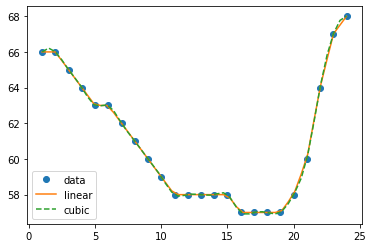

In [10]:
import scipy.interpolate as inter

f1 = inter.interp1d(time_gap, band_speed)  # 一次插值拟合
f3 = inter.interp1d(time_gap, band_speed, kind='cubic')  # 三次样条插值
xnew = np.linspace(1,24, 48)
plt.plot(time_gap, band_speed, 'o', xnew, f1(xnew), '-', xnew, f3(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

## (三) : 以积分知识解决工程问题

<div class="alert alert-info" role="alert">

❓ 鉴于 GitModel 公司刚上市$,$ 承接了许多数学建模相关业务. 有一家工程企业给出了这样一个任务 : 该企业准备制造一批抽水机$,$ 需要得到其各种数据来决定抽水机的性能参数. 企业首先对圆柱形的储水桶进行了抽水测试$,$ 需要求出将桶内的水全部抽出需要做多少功？

储水桶的数据如下 : 高 $5\mathrm{m}$ $,$ 底面圆半径 $3\mathrm{m}$：
<img src="./figures/1-12.jpg" width=400>
</div>

为了将水抽出来$,$ 抽水机只需要施加与水相同的重力 $G$ 即可. 然而$,$ 如图所示$,$ 不同水平面上抽水的位移是不同的$,$ 这导致我们无法将整桶水看作一个质点$,$ 自然无法用高中物理的做功计算求出数值.
<img src="./figures/1-13.jpg" width=300>
<center>不同平面位移不同</center>

<img src="./figures/1-14.jpg" width=300>
<center>离散分割</center>

老师$,$ 我只知道高中物理的方法$,$ 能不能改进高中物理方法来解决这个问题呢: **整桶水无法看作一个质点$,$ 那能否将整桶水看作 $n$ 个单位质点呢?**

众所周知$,$ 水桶中的水是**连续**的整体$,$ 如果我们将水分割成 $n$ 个单位$,$ 那么求出来的数值只是一个近似$,$ 不过当 $n$ 越来越大时$,$ 误差就会越来越小!

由于抽水过程水的位移只有垂直方向$,$ 我们从高到低将水有序分割成 $n$ 个单位$,$ 每个单位都是一个小型水柱$,$ 长为 $h_i=\dfrac{5}{n} \mathrm{m},$ 简易计算可知单位重力为 $G_i=\rho V_ig=\rho gr^2\pi h_i=\dfrac{441\pi}{n} \mathrm{N}.$ 水柱的重心在体心$,$ 那么抽第 $i$ 个单位的水需要的位移是 $x_i=\dfrac{5i}{n}\mathrm{m}.$ 所以抽水做功的近似值就是对数列 $G_ix_i$ 的前 $n$ 项求和

$$
W\approx \sum_{i=1}^nG_ix_i=\dfrac{441\pi}{n}\sum_{i=1}^n\dfrac{5i}{n}=441\pi\dfrac{5n+5}{2n}=1102.5\pi+\dfrac{5\pi}{2n}.
$$

当 $n$ 越来越大时$,$ 误差项 $\dfrac{5\pi}{2n}$ 就会越来越小$,$ 我们有理由猜测抽水做功 $W$ 就是 $1102.5\pi\approx 3436 \mathrm{J}$ !

老师$,$ 那只是我们的猜测$,$ 有没有更精确的方法呢? 

当然有! 事实上$,$ 我们能分割水柱是因为每个**单位水柱中所有水的位移**是**近似相同**的$,$ 当分割当什么程度时单位中所有水的位移是相同的呢 : 分割至质点大小的时候$,$ 如图所示$,$ 这时每个单位水柱的位置及其位移可以用距离桶底的高度 $h$ 来完美表达! 这便是高中物理常用的微元法$,$ 而此时数列求和即变为积分!

<img src="./figures/1-15.jpg" width=300>

\begin{align*}
	\text{单位长度} \ h_i &\rightarrow{n \text{越来越大}} \text{长度微分} \ dh,\\
	\text{单位重力} \ G_i&\rightarrow{n \text{越来越大}} \text{重力微分} \ dG=\rho g r^2\pi dh=88.2\pi dh,\\
	\text{单位位移} \ x_i&\rightarrow{n \text{越来越大}} \text{位移函数} \ x(h)=5-h,\\
	\text{做功总和} \ \sum_{i=1}^nG_ix_i &\rightarrow{n \text{越来越大}}  \text{做功积分}\ \displaystyle\int_{0}^5 x(h)dG =\displaystyle\int_{0}^5 88.2\pi (5-h)dh.
\end{align*}

利用python进行数值计算得：

In [13]:
from scipy import integrate # 已知函数表达式积分
from scipy import pi
def f(h):
    '''
    定义函数表达式.
    '''
    return 88.2 * pi * (5 - h)
v, err = integrate.quad(f, 0, 5) # 被积函数与积分区间
v

3463.605900582747

<div class="alert alert-info" role="alert">
<strong> 📋 小结： </strong> 

本质上$,$ 微元法其实就是分析学中积分的应用 : 将<strong>连续变化</strong>的函数 $($变力做功$,$ 恒力变位移做功$,$ 连续型随机变量期望值等等连续物理量$)$ 先微分再积分得到相关量$,$ 这在处理<strong>非离散或离散程度小的建模问题</strong>中尤为常见.
</div>

<div class="alert alert-info" role="alert">

❓ 紧接着 GitModel 公司又接到另一家工程企业的任务 : 由于吊桥的年久失修导致一些铁链生锈而质量发生了改变$,$ 为保证安全必须重新测量铁链的总体质量$,$ 而体积巨大难以拆卸重组的铁链无法直接测量其质量$,$ 仅能靠检测每块铁环的质量来估计整体变化的质量$,$ 然而逐块检测是一项巨大的工程$,$ 需要耗费巨额的时间与人力.

据专家分析$,$ 若以桥梁中心为原点建立空间坐标系$,$ 铁链的 $y$ 轴坐标可以近似相同. 铁链上每块铁环的密度仅与其所处的横向距离以及海拔 $(x,z)$ 有关$,$ 经数值拟合可得到密度 $(\mathrm{kg}/\mathrm{m}^3)$ 与位置 $(\mathrm{m})$ 的函数为 
$$
\rho(x,z)=7860\left(1+1.5^{2-\frac{z}{10}-0.1\left(\frac{x}{50}\right)^2}\right)
$$ 及铁链的垂直面曲线方程为
$$z=30\cosh \dfrac{x}{300},
$$ 铁环是圆柱形的$,$ 半径为 $r=0.15 \mathrm{m}$. GitModel 公司如何通过不直接检测的方式来估计铁链的质量呢?
    
<img src="./figures/1-16.jpg" width=300>
<center> 吊索桥图示 </center>
<img src="./figures/1-17.jpg" width=400>
<center> 平面曲线 </center>
</div>

我们发现$,$ 这其实也是类似于上文问题的离散程度小的问题 $($因为铁链的铁环数足够多使得我们可以近似于连续问题$),$ 每块铁环可以当作圆柱形状的微元$,$ 其具有密度与位置的函数 $\rho(x,z),$ 长度微分 $ds$ 以及体积微分 $dV$  那么我们同样可以应用积分来求出质量.

那么该问题是否可以照搬上文的方法呢? 我们接着往下分析两个问题的不同. 应该注意到 : 第一个问题是位移**在垂直直线上的分布**, 而该问题是密度 $($质量$)$ **在曲线上的分布** $,$ 这代表着我们无法通过常规积分的方式来求$,$ 因为我们的坐标轴不是一条直线!

当然$,$ 分析学同样提供了在曲线上的积分方式$,$ 我们称为曲线积分. 本问题就是一个经典的**第一型曲线积分**问题——知道曲线上每个点 $(x,z)$ 上的**分布函数** $\rho(x,z),$ 求曲线的质量 $M=\displaystyle\int_L m(x,z)ds,$ 其中$,$ 类似于我们对坐标 $x$ 做微分 $dx,$ 曲线上的坐标可以用长度来表示$,$ 所以我们对曲线的长度做了微分 $ds$ 后进行积分处理. 与直线积分有所不同的是$,$ 我们无法以曲线为轴$,$ 但仍然可以将曲线放在坐标系中$,$ 此时由勾股定理我们可以求出长度微分的表达式$,$ 如下 : 

\begin{align*}
	\text{单位长度} \ s_i=\sqrt{x_i^2+z_i^2} &\rightarrow{\text{分割越来越细}} \text{长度微分} \ ds=\sqrt{(dx)^2+(dz)^2},\\
	\text{单位体积} \ V_i=s_ir^2\pi &\rightarrow{\text{分割越来越细}} \text{体积微分} \ dV=r^2\pi ds,\\
	\text{单位质量} \ m_i=\rho(x,z)V_i&\rightarrow{\text{分割越来越细}} \text{质量函数} \  \rho(x,z)  dV,\\
	\text{总质量} \ \sum_{i=1}^{n}\rho(x_i,z_i)V_i &\rightarrow{\text{分割越来越细}}  \text{质量积分}\ \displaystyle\int_L \rho(x,z) dV=\displaystyle\int_L \rho(x,z)r^2\pi d s.
\end{align*}

**注:** 当 $\rho(x,z)$ 恒等于 $1$ 时$,$ 事实上就是在求曲线的长度.

在进行铁链质量数值估算之前$,$ 我们先给出第一型曲线积分的计算方式. 往往我们计算曲线积分需要知道曲线 $L$ 的参数方程 $x=x(t),z=z(t)$ 以及参数 $t$ 的取值范围 $[a,b]$. 问题中提到铁链的近似方程为 $z=30\cosh \dfrac{x}{300},$ 也就是说$,$ 铁链曲线的参数方程可用 $x$ 作为参数$,$ 其范围是 $[-300,300],$ 我们将铁链曲线方程写成如下参数形式 :
$$\begin{cases}
	z(x)=30\cosh\dfrac{x}{300}\\
	x(x)=x\\
\end{cases},x\in [-300,300]$$ 
那么$,$ 铁链的质量可由如下曲线积分计算方式给出 : 

<div class="alert alert-info" role="alert">
<strong> 定义4:[第一型曲线积分的计算方式] </strong> 

设平面曲线 $L$ 的参数方程为 $x=x(t),z=z(t),t\in [a,b],$ $\rho(x,z)$ 为定义在 $L$ 上的连续函数$,$ 则
	$$\displaystyle\int_{L}\rho(x,z)d s=\displaystyle\int_{a}^b\rho(x(t),z(t))\sqrt{(x'(t))^2+(z'(t))^2}d t.$$ 
</div>

我们代入问题给出的方程 $\rho(x,z),z(x)$ 以及铁环半径 $r=0.15 \mathrm{m}^3$ 即可得到铁链的总质量计算式为
$$11.79\displaystyle\int_{-300}^{300}\left(1+1.5^{2-3\cosh\frac{x}{300}-0.1\left(\frac{x}{50}\right)^2}\right)\sqrt{100+\sinh^2\dfrac{x}{300}}dx.$$

下面给出第一型曲线积分python代码，铁链质量的估算值为 $98635 ~\mathrm{t}$

In [14]:
# 第一型曲线积分
from scipy import sinh, cosh, sqrt
def f(x):
    index1 = (2 - 3 * cosh(x/300) - 0.1 * ((x/50)**2))
    return (1 + 1.5 ** index1) * sqrt(100 + (sinh(x/300))**2)

v, err = integrate.quad(f, -300, 300)
v * 11.79

<ipython-input-14-d4c6255e9666>:4: DeprecationWarning: scipy.cosh is deprecated and will be removed in SciPy 2.0.0, use numpy.cosh instead
  index1 = (2 - 3 * cosh(x/300) - 0.1 * ((x/50)**2))
<ipython-input-14-d4c6255e9666>:5: DeprecationWarning: scipy.sinh is deprecated and will be removed in SciPy 2.0.0, use numpy.sinh instead
  return (1 + 1.5 ** index1) * sqrt(100 + (sinh(x/300))**2)
<ipython-input-14-d4c6255e9666>:5: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  return (1 + 1.5 ** index1) * sqrt(100 + (sinh(x/300))**2)


98635.09908278256

<div class="alert alert-info" role="alert">

❓ 有了直线积分$,$ 曲线积分$,$ 我们自然会问 : 有没有平面积分以及曲面积分呢? 当然! 事实上$,$ 由于我们还会接触变力曲线做功$,$ 这代表在每个点上的分布函数不再是标量函数而是向量函数! 分析学还给出了第二类曲线积分以及曲面积分.
</div>
<img src="./figures/1-18.png">

有一位爱钻牛角尖的同学发出了提问——老师$,$ 这样的方法还是太$"$数学$"$了$,$ 并且理想很丰满$,$ 现实很骨感$,$ 万一**没有函数表达式呢?**又万一有函数表达式但**积分太难算了呢?**

别急$,$ 数学家也想到了应用性的问题$,$ 理论总是要落地的嘛! 所以有了计算机之后$,$ 许多数值计算的方法也被发明了出来$,$ 其中就包括了**数值积分**的方法——计算机可以通过数值方法对许多**不连续**函数甚至是**无法写出表达式**的函数进行积分! 这便很好地解决了积分在实际应用上的问题.这将在我们的**2.0课程中与大家见面**👋



## 实战项目——人口增长问题

<div class="alert alert-warning" role="alert">
<h4>💼 任务来袭</h4>

GitModel 公司对面试的实习生给出了这样一个问题 : 搜集 $1950\sim 2020$ 年间美国人口数据$,$ 猜测其满足的函数关系$,$ 并综合数据预测美国 $2030$ 年的人口数.

公司希望实习生就以下的<strong>开放性</strong>问题给出自己的想法，公司要求实习生<strong>提交预测的思路$,$ 模型$,$ 算法以及结果</strong>.

面试官给出了如下提示 : 预测值与真实值存在误差$,$ 该问题如何转化为可用上述所学的知识解决的问题呢? 
</div>



<div class="alert alert-warning" role="alert">

$(1)$  从你的数据来看$,$你猜想美国人口与时间的关系应该满足怎样的函数关系$($线性$,$二次$,$或是其他$)$? 这样的函数关系你如何确定? 又怎么衡量这个函数具有良好的预测效果?[请在下方Markdown方格中写下你的答案]

> 双击写下你的想法：

<div class="alert alert-warning" role="alert">

$(2)$ 也许你可以尝试用不同的函数关系进行预测$,$比较一下是哪种函数更贴合数据$,$但是$,$越贴合数据的函数是否真的预测的结果越可信?你可以查阅资料去了解该问题$,$但我们更希望你能解释这个问题的内在原理$,$如果能给出相应的解决方法那就更好了![请在下方Markdown方格中写下你的答案]
</div>

> 双击写下你的想法：


<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">Well done!</h4>
  <p>恭喜你，完成了《动手学高等数学》的学习，希望在日后的数模竞赛中，通过本课程的学习，你可以更加深刻的理解微积分的强大之处.</p>
  <hr>
  <p class="mb-0">如有需要领取本次组队学习的答案，敬请关注公众号以及留意直播讲解！</p>
</div>